In [1]:
import time
import gym
import tensorflow as tf
import numpy as np

In [2]:
env=gym.make('Alien-v0')
action_space_len=env.action_space.n
print(env.action_space)
print(env._max_episode_steps)

Discrete(18)
10000


In [3]:
scores=[]
train_data=[]
accepted_score=[]
required_score=70

for i in range(50):
    env.reset()
    score=0
    game_memory=[]
    prev_obs=[]
    for j in range(1000):
        
        action=env.action_space.sample()
        obs,reward,done,info=env.step(action)
        ###########
        reward-=0.1
        ###########
        if len(prev_obs)>0:
            game_memory.append([prev_obs,action])
        prev_obs=obs
        
        #env.render()
        #time.sleep(0.013)
        score+=reward
        if done:            
            break
    scores.append(score)
    if score>required_score:
        accepted_score.append(score)
        for data in game_memory:
            train_data.append(data)
    if i %10==0:
        print(f'iter>{i}\tscore>{score}')

iter>0	score>82.10000000000277
iter>10	score>117.70000000000366
iter>20	score>589.9999999999891
iter>30	score>28.69999999999923
iter>40	score>71.90000000000305


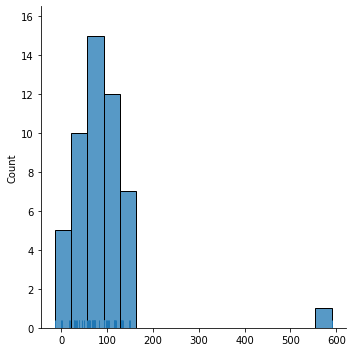

In [4]:
import seaborn as sns
sns.displot(scores,rug=True)

In [5]:
train_x=np.array([i[0] for i in train_data]).reshape(-1,210,160,3)
y_val=np.array([i[1] for i in train_data]).reshape(-1)
print(y_val.shape)
train_y=np.array(tf.one_hot(y_val,action_space_len)).reshape(-1,18)
train_x=train_x[:5000]
train_y=train_y[:5000]
#v=[0]*action_space_len
#train_y=[]
#idx=0
#for i in y_val:
#    train_y.append(np.array(v))
#    train_y[idx][i]=1
#    idx+=1
    
#train_y=np.array(train_y).reshape(-1,action_space_len)

(23929,)


In [6]:
print(train_x.shape)
print(train_y.shape)

(5000, 210, 160, 3)
(5000, 18)


In [14]:
model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(input_shape=(210,160,3),kernel_size=(3,3),filters=128),
        tf.keras.layers.MaxPool2D(strides=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256),
        tf.keras.layers.MaxPool2D(strides=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64,activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(units=18,activation='softmax')
    ])
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 208, 158, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 104, 79, 128)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 102, 77, 256)      295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 51, 38, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 36, 64)        147520    
_________________________________________________________________
flatten_2 (Flatten)          (None, 112896)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [15]:
#testval=model.predict(train_x[0].reshape(-1,210,160,3))
#print(testval)
print(train_x.shape)
print(train_y.shape)

(5000, 210, 160, 3)
(5000, 18)


In [16]:
hist=model.fit(train_x,train_y,epochs=10, validation_split=0.25)

Epoch 1/10
118/118 [==============================] - 12s 103ms/step - loss: 574.0209 - accuracy: 0.0629 - val_loss: 2.8906 - val_accuracy: 0.0536
Epoch 2/10
118/118 [==============================] - 12s 100ms/step - loss: 2.8900 - accuracy: 0.0616 - val_loss: 2.8908 - val_accuracy: 0.0536
Epoch 3/10
118/118 [==============================] - 12s 100ms/step - loss: 2.8897 - accuracy: 0.0592 - val_loss: 2.8909 - val_accuracy: 0.0536
Epoch 4/10
118/118 [==============================] - 12s 100ms/step - loss: 2.8895 - accuracy: 0.0597 - val_loss: 2.8911 - val_accuracy: 0.0536
Epoch 5/10
118/118 [==============================] - 12s 100ms/step - loss: 2.8893 - accuracy: 0.0589 - val_loss: 2.8913 - val_accuracy: 0.0528
Epoch 6/10
118/118 [==============================] - 12s 100ms/step - loss: 2.8892 - accuracy: 0.0597 - val_loss: 2.8914 - val_accuracy: 0.0528
Epoch 7/10
118/118 [==============================] - 12s 101ms/step - loss: 2.8890 - accuracy: 0.0621 - val_loss: 2.8916 - val_